<head style = "position:absolute; left:0px">
    <div style="width: 15%; float:left; height:100px;">
        <img src = "https://www.dropbox.com/s/mz416p4rrm692ed/lse_logo.png?raw=1" style="width: 100px; height: 35px; float:left; margin-top: 30px">
    </div>
    <div style="width: 70%; float:left; height:100px;">
        <h4 style = "text-align:center;margin-top: 30px;">FM442: Quantitative Methods for Finance and Risk Analysis</h4>
    </div>
    <div style="width: 15%; float:left; height:100px;">
        <p style = "text-align:right;margin-top:30px">Jon Danielsson<br>
    Michaelmas Term 2020</p>
    </div>
</head>

<h1 style = "text-align: center; font-size: 36px">Seminar 3</h1>

In this class we will:  

[1. Learn how to work with distributions](#1)  
[2. Explore random numbers and the Monte Carlo simulation](#2)    
[3. Visualize, analyse, and comment on the prices of a stock](#3)    
[4. Perform graphical analyses and statistical tests](#4)  

___
### Loading packages

We first load the packages for this seminar:

In [39]:
library(tseries)
library(car)
library(lubridate)

___
<a name="1"></a>
## Statistical distributions

We need to be comfortable working with Probability Distributions in order to build financial risk forecasting models. In particular, we are going to work with the Normal Distribution, the Student-T, and the Chi-Square distribution. The names of these distributions in R, respectively, are: `norm`, `t`, and `chisq`.

Every distribution in R has four functions:
* `p` for "probability, or the cumulative distribution function (cdf)
* `q` for "quantile", the inverse of the cdf
* `d` for density, the probability density function (pdf)
* `r` for "random", a random variable drawn from the specified distribution  

To apply any of these, you just need to add them before the distribution's name.

For example, we can use `pnorm` to calculate the cdf:
$$F(x) = P(X≤x)$$
Where $X$ is a normally distributed random variable.

In [40]:
# CDF of 0 under a Standard Normal
pnorm(0)

[1] 0.5

In [41]:
# CDF of 8 under a Normal with mean 10 and standard deviation 2
pnorm(8, mean = 10, sd = 2)

# Rounding it
round(pnorm(8, mean = 10, sd = 2),3)

[1] 0.1586553

[1] 0.159

In [42]:
# Sequence from -2 to 2, with increments of 0.5
sequence <- seq(-2, 2, 0.5)
round(pnorm(sequence),3)

[1] 0.023 0.067 0.159 0.309 0.500 0.691 0.841 0.933 0.977

For many applications, we will be interested in looking for the inverse of the cdf. For example, if we want to find the 95-th quantile of a Student-t with 3 degrees of freedom:

In [43]:
# Inverse CDF of 0.95 under a Student-t with 3 degrees of freedom
qt(0.95, df = 3)

[1] 2.353363

### Plotting a distribution

We can read probability-quantile combinations from the CDF plot of a distribution. Let's find the 5% quantile of a Standard Normal: 

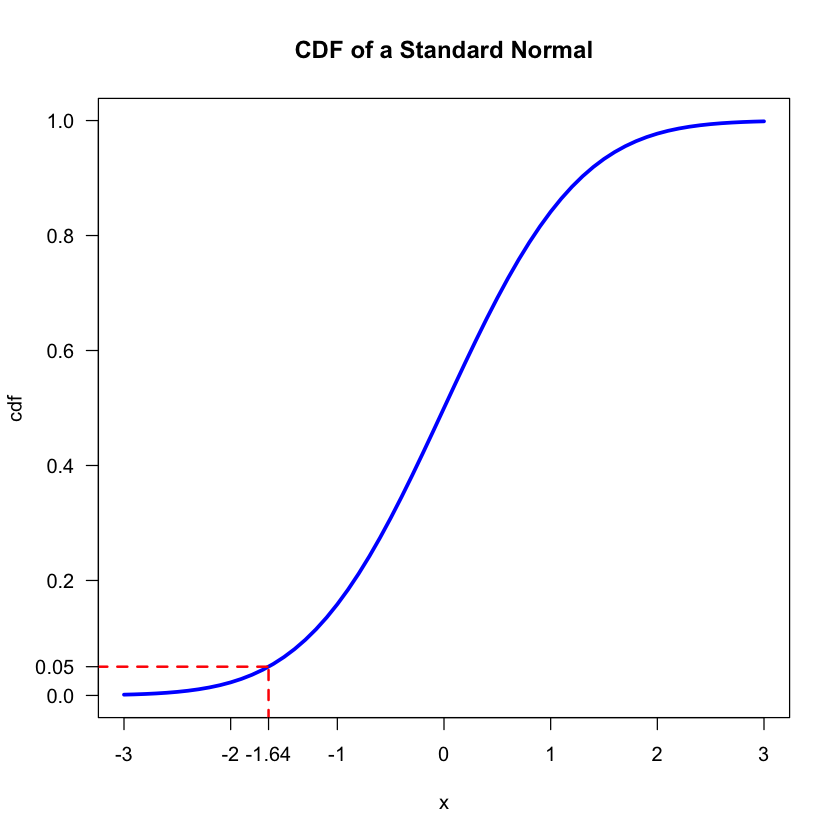

In [44]:
# Creating a sequence
x <- seq(-3,3,0.1)

# Vector with the CDF
cdf <- pnorm(x)

# Plotting it
plot(x, cdf, type = "l", main = "CDF of a Standard Normal",
    lwd = 3, las = 1, col = "blue")

# Find 5% quantile using qnorm
q5 <- qnorm(0.05)

# Add lines using the segments() function
segments(x0 = q5, y0 = -1, y1 = 0.05, lty = "dashed", lwd = 2, col ="red")
segments(x0 = -4, y0 = 0.05, x1 = q5, lty = "dashed", lwd = 2, col ="red")

# Add tick marks in the plot
axis(1, at = q5, label = round(q5,2))
axis(2, at = 0.05, label = 0.05, las = 1)

### Comparing the Normal Distribution with the Student-t

The Student-t distribution has fatter tails than the Normal, which can be convenient for some applications. The lower the degrees of freedom of a Student-t, the fatter the tails. By definition, a Student-t will converge to a Normal distribution as the degrees of freedom go to infinity.

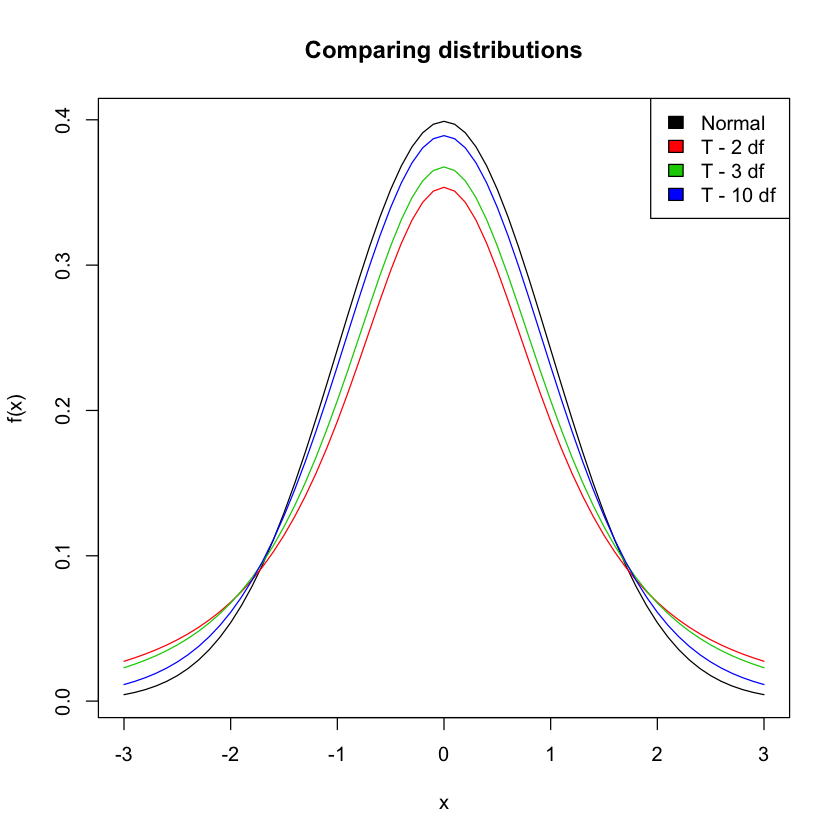

In [45]:
# Start by creating a sequence
x <- seq(-3, 3, 0.1)

# Normal density
normal <- dnorm(x)

# Student-t with 2 df
st2 <- dt(x, df = 2)

# Student-t with 3 df
st3 <- dt(x, df = 3)

# Student-t with 10 df
st10 <- dt(x, df = 10)

plot(x, normal, type = "l", main = "Comparing distributions", col = 1, xlab = "x", ylab = "f(x)")
lines(x, st2, col = 2)
lines(x, st3, col = 3)
lines(x, st10, col = 4)

legend("topright", legend = c("Normal", "T - 2 df", "T - 3 df", "T - 10 df"), col = c(1:4), fill = c(1:4))

___
<a name="2"></a>
## Random numbers and Monte Carlo

One of the advantages of working with statistical software is being able to do simulations using random (or better said, pseudorandom) numbers. We will go into more details on random numbers generation in Chapter 7.

We can get random numbers drawn from a specific distribution by using the prefix `r` before the distribution name:

In [46]:
# One random number from a Standard Normal
rnorm(1)

# Ten random numbers from a Normal(10, 0.5)
rnorm(10, mean = 10, sd = 0.5)

# One random number from a Student-t with 5 degrees of freedom
rt(1, df = 5)

[1] 0.9370124

[1]  9.277463 10.031636 10.174632 10.768196  9.740407  9.924410  8.751179
 [8]  9.768378 10.825538  9.581575

[1] -0.3148575

Everytime we run a function that outputs random numbers, we will get a different value. Usually, to allow for replication, we set a `seed`:

In [47]:
set.seed(442)
rnorm(5)

[1] -0.89489136 -2.69216795  0.76409907 -0.01723562 -1.62406010

In [48]:
set.seed(442)
rnorm(5)

[1] -0.89489136 -2.69216795  0.76409907 -0.01723562 -1.62406010

### Comparing distributions using random numbers

To show the Fat Tails of the Student-t compared to the Normal distribution, we will draw 1000 points from each distribution:

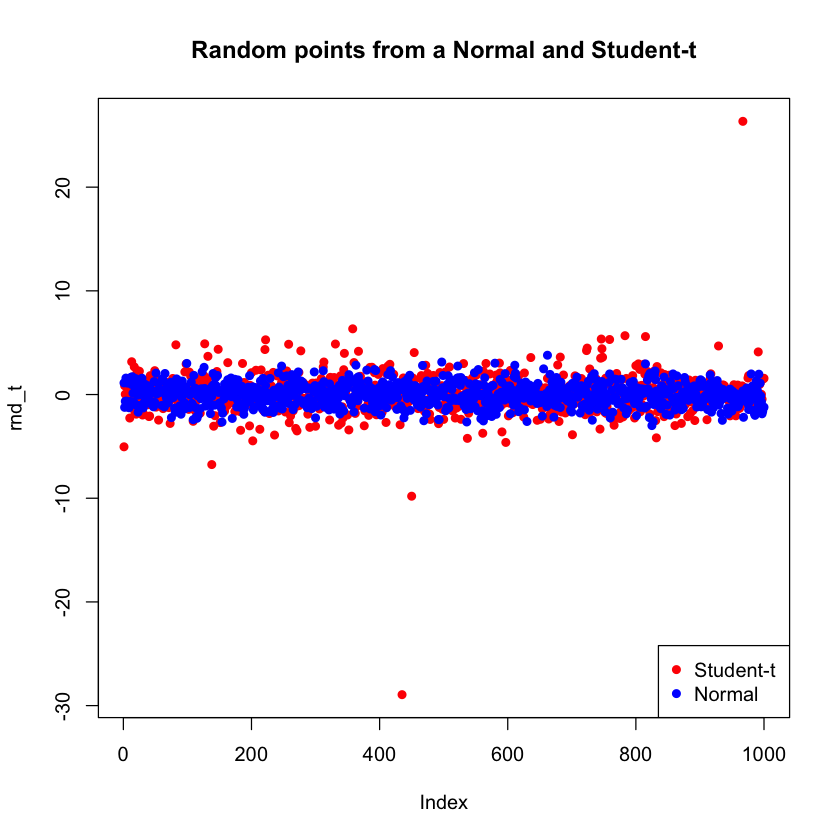

In [49]:
# Normal distribution 
rnd_normal <- rnorm(1000)

# Student-t
rnd_t <- rt(1000, df = 3)

# Plotting
plot(rnd_t, col = "red", pch = 16, main = "Random points from a Normal and Student-t")
points(rnd_normal, col = "blue",pch = 16)

# Adding a legend
legend("bottomright", legend = c("Student-t", "Normal"), pch = 16, col = c("red", "blue"))

We see that the points from a Student-t distribution take on more extreme values compared to the Normal. This is a consequence of fat tails.

### Assigning your grades with a random number generator

Let's say I want to assign your grades for FM442 using a random number generator. Grades go from 0 to 100 and have to be integers. Drawing numbers from a distribution like the Normal or the Uniform will give us non-integers, so we can either:

* Round the number to the nearest integer
* Use a different function, like `sample()`, which only outputs integers

We will use the latter. `sample(x,size)` takes a vector `x`, and a `size`, and returns a vector of the given size of random draws from `x`:

In [50]:
sample(1:100, 1)
sample(1:100, 3)
sample(1:100, 5)

[1] 44

[1] 53 10 37

[1]  9 31 20 18 86

Let's say there are 60 students in the class, we can get the grades:

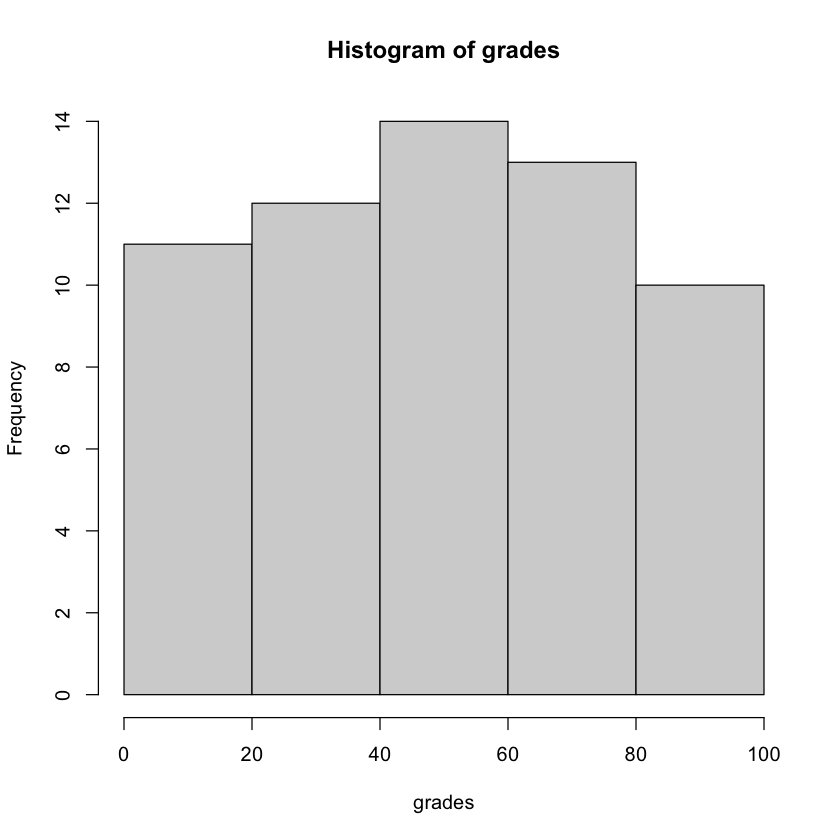

In [51]:
# Getting the grades
grades <- sample(1:100, 60)

# Creating a histogram
hist(grades, col = "lightgray")

How many people got a Distinction:

In [52]:
# We can use a condition in the square brackets to subset the vector:
length(grades[grades >= 70])

[1] 18

# Small and Large sample properties

Let's explore the distribution of random samples of different sizes, drawn from a standard normal distribution, compared to the distribution:

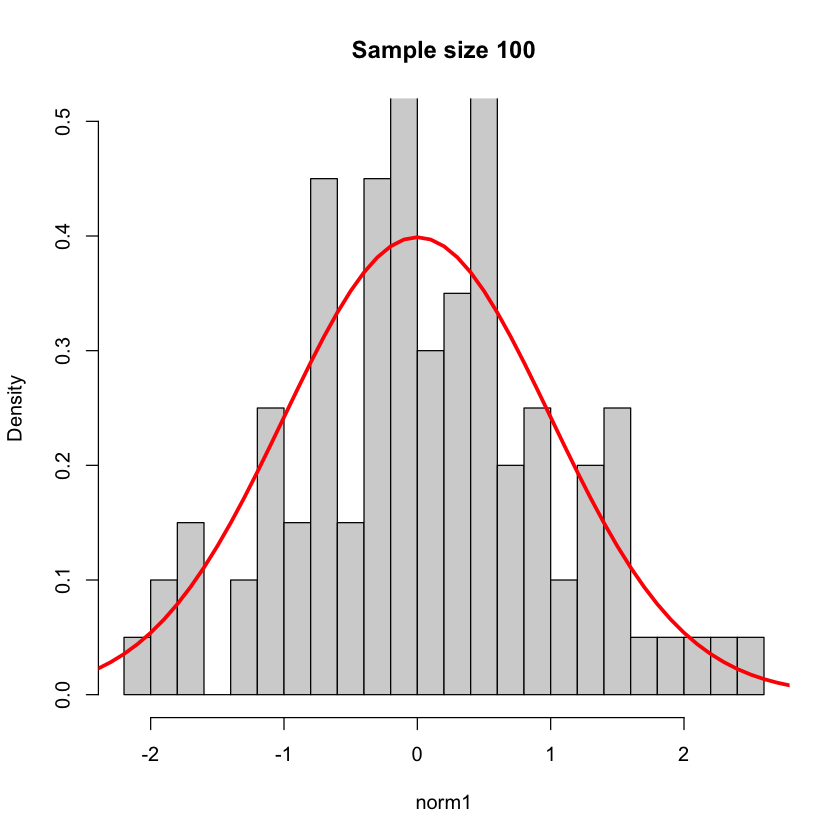

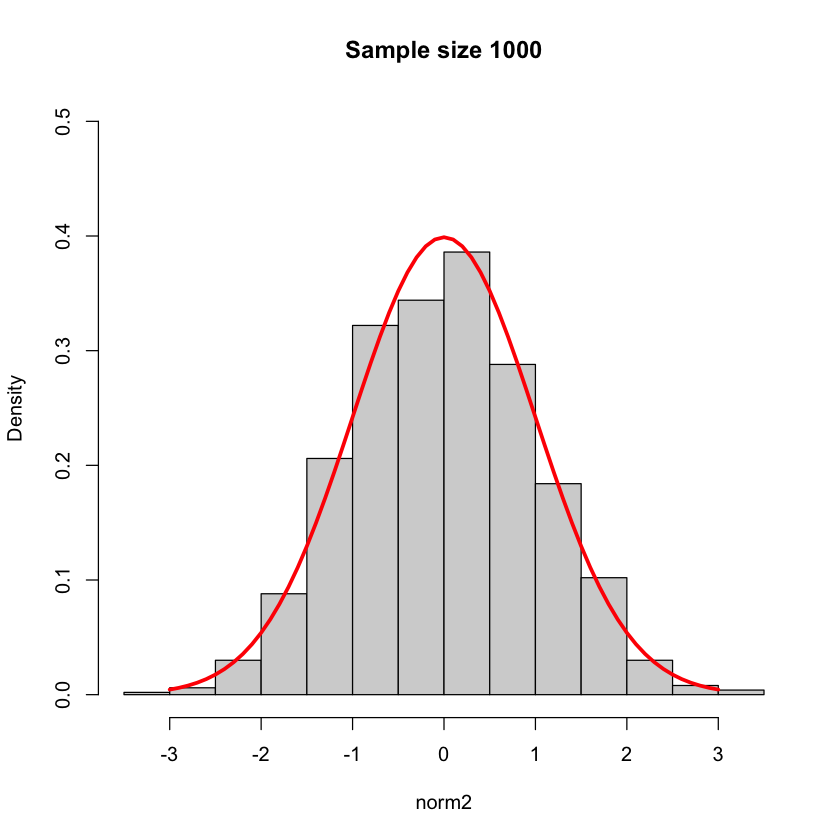

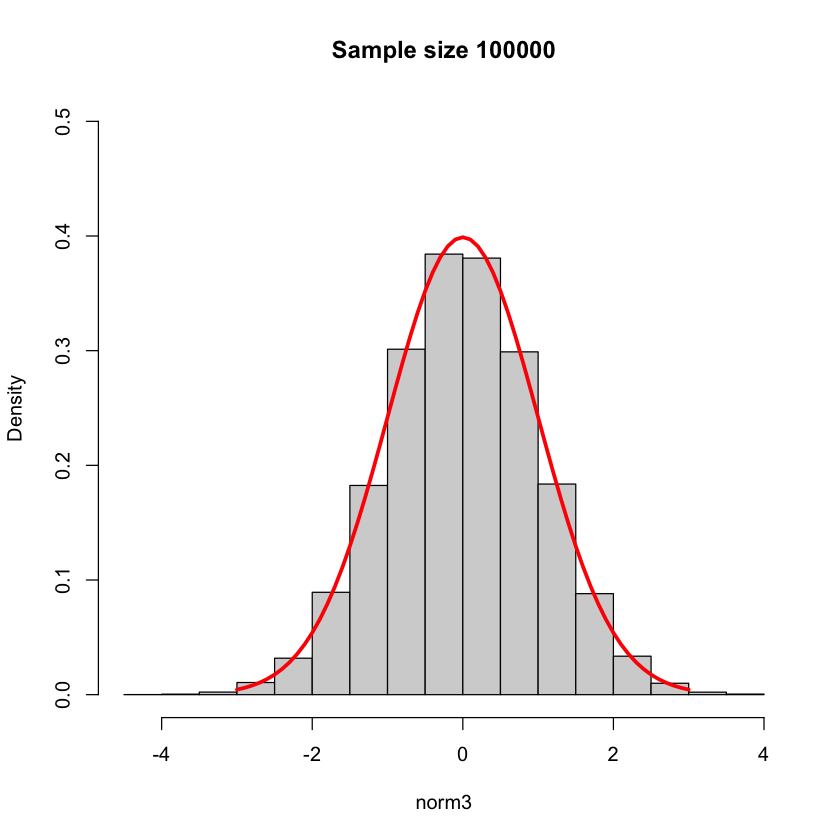

In [53]:
# Sample size: 100
norm1 <- rnorm(100)

# Sample size: 1000
norm2 <- rnorm(1000)

# Sample size: 100000
norm3 <- rnorm(100000)

# Create a sequence
x <- seq(-3,3,0.1)

# Plot the histograms and overlay a normal distribution
hist(norm1, freq = FALSE, breaks = 20, main = "Sample size 100", col = "lightgrey", ylim = c(0, 0.5))
lines(x,dnorm(x), lwd = 3, col = "red")
hist(norm2, freq = FALSE, breaks = 20, main = "Sample size 1000", col = "lightgrey", ylim = c(0, 0.5))
lines(x,dnorm(x), lwd = 3, col = "red")
hist(norm3, freq = FALSE, breaks = 20, main = "Sample size 100000", col = "lightgrey", ylim = c(0, 0.5))
lines(x,dnorm(x), lwd = 3, col = "red")

### Monte Carlo

A Monte Carlo method is a class of computational algorithm that uses repeated random sampling to obtain numerical results. It is commonly used in quantitative finance to simulate uncertainty and analyze instruments, portfolios or investments.

We are going to do a simple exercise to simulate the profit and loss distribution from holding a stock. 

Assume we have a stock that has normally distributed returns with mean $0$ and variance $\sigma^{2}$, and a risk-free interest rate $r$. We can then simulate $S$ one-day returns:

$$ y_{t+1,i} \sim \mathcal{N}\left(0,\sigma^{2}\right), i = 1, ..., S $$

And with each simulated return, calculate the one-day future price following the formula. The last term is the _lognormal correction_. We will discuss this in detail in chapter 7:

$$P_{t+1,i} = P_{t}e^{r(1/365)} \times e^{y_{t+1,i}} \times e^{-0.5\sigma^{2}}$$

Consider a stock $X$ with price $100$, and daily volatility $0.01$. The annual risk free rate is $5\%$. We will find the distribution of profits and loss for tomorrow's price.

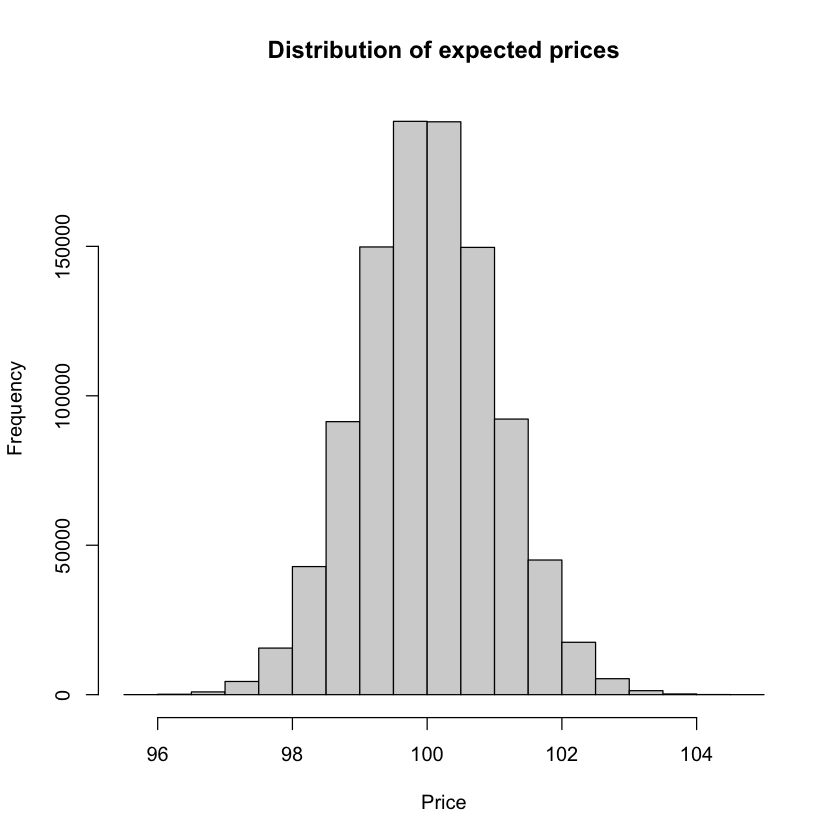

In [54]:
# Initial price
X_0 <- 100

# Volatility
sigma <- 0.01

# Interest rate
r <- 0.05

# Initialize a vector that will contain all realizations
X_1 <- numeric()

# Perform one million realizations
for (i in 1:10^6) {
    X_1[i] <- X_0*exp(r/365)*exp(rnorm(1,0,sigma)-sigma^2/2)
}

# Plot a histogram
hist(X_1, col = "lightgray", main = "Distribution of expected prices",
    xlab = "Price")

We don't know what tomorrow's price will be, but based on the assumptions we made, this experiment gives us the possible values. 

We can order the values and find the quantile of this distribution using the `quantile()` function. 

Let's find what is the 5% quantile of our expected price:

In [55]:
quantile(X_1, 0.05)

5% 
98.3791

Adding the 5% quantile as a vertical line in the plot:

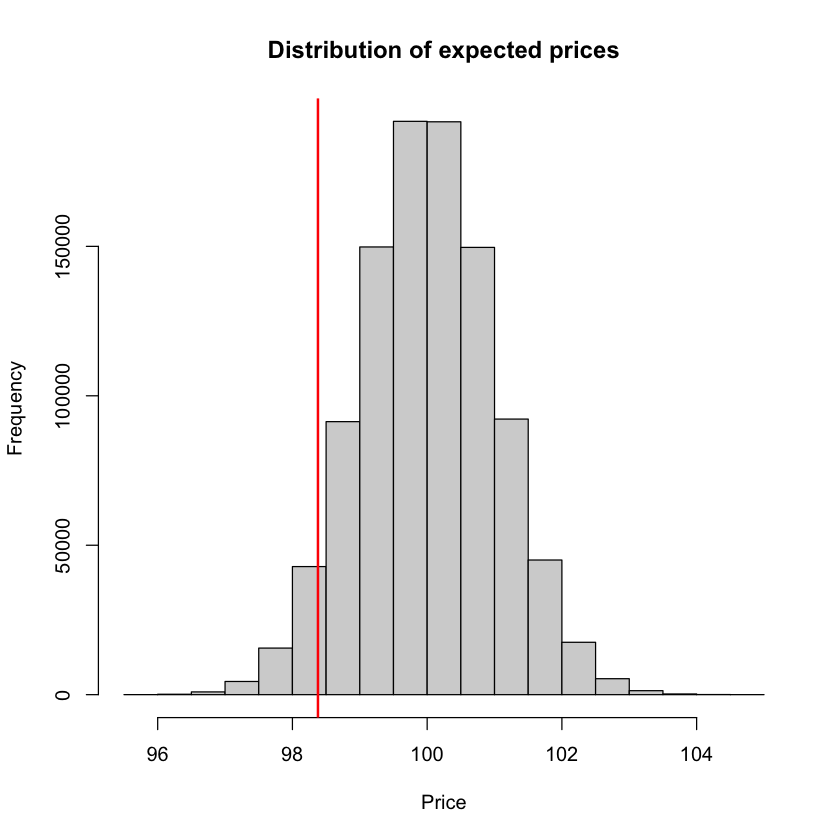

In [56]:
hist(X_1, col = "lightgray", main = "Distribution of expected prices",
    xlab = "Price")

abline(v = quantile(X_1, 0.05), lwd = 2, col = "red")

### Random Walk

A random walk is a _stochastic process_ that describe the path of a variable that moves randomly through time. For example, consider the process:

$$Y_{t} = Y_{t-1} + \epsilon_{t}$$

Where $Y_{0}$ is given and $\epsilon \sim \mathcal{N}\left(0,\sigma^2\right)$.

We can consider a stock, $Y$, that at time $0$ has price of 500, and follows a random walk with $\sigma^2 = 2$ . If we want to see how the price evolves over time, we can use R to create a large number of simulations. Let's see one thousand different simulations on how the price of the stock would move in one hundred days:

In [4]:
# Create a matrix to hold the paths. One column for every simulation and one row for each day, starting from 0
mtx <- matrix(NA, nrow = 101, ncol = 1000)

# Since at time 0 the price is 500, we fill the first row with this value
mtx[1,] <- 500

# Use a loop to draw the path of the price for each simulation

# i represents the simulation, from 1 to 1000
for (i in 1:1000) { 
    
    # j represents the row in our matrix, one for each day
    for (j in 2:101) {
        
        # We proceed to fill the matrix following the random walk
        mtx[j,i] <- mtx[j-1,i] + rnorm(1, mean = 0, sd = 2.5)
    }
}

We have run 1000 simulations, each starts with a price of 100 and follows a random walk for 100 time periods. Let's see the head of the matrix:

In [5]:
head(mtx)

500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,⋯,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000,500.0000
497.4730,500.6141,500.7086,501.2396,498.2074,502.2359,499.5943,504.6308,500.8661,499.2514,⋯,497.0631,501.6005,497.0751,502.6585,501.0505,495.3562,502.5410,500.0095,501.8358,500.9092
500.4940,503.9456,501.2562,502.5058,505.0726,502.3084,501.0884,501.9273,503.6714,497.7203,⋯,500.8220,500.3946,496.3692,502.4713,505.9253,498.3714,504.2104,500.5267,504.8215,500.3047
496.3450,503.3618,502.1960,501.8873,506.1756,501.2923,498.6686,496.9498,498.9511,493.3669,⋯,500.2172,500.5884,493.6703,495.2946,503.8849,498.8223,504.3627,497.8238,508.2044,497.8299
500.1308,505.9729,504.0924,499.4888,505.7583,504.5040,498.2979,498.3585,495.1515,496.6513,⋯,505.4030,498.5791,490.4436,495.3772,502.2266,500.9999,503.4992,503.4886,507.2814,494.1244
496.6878,507.5609,505.2794,508.4140,509.6336,500.8331,497.8810,498.5668,495.4327,500.3786,⋯,508.8021,496.9854,492.2669,495.2150,495.7652,488.3693,501.9535,501.7482,505.9730,493.2095


We can plot it using `matplot()` to see the random walk visually:

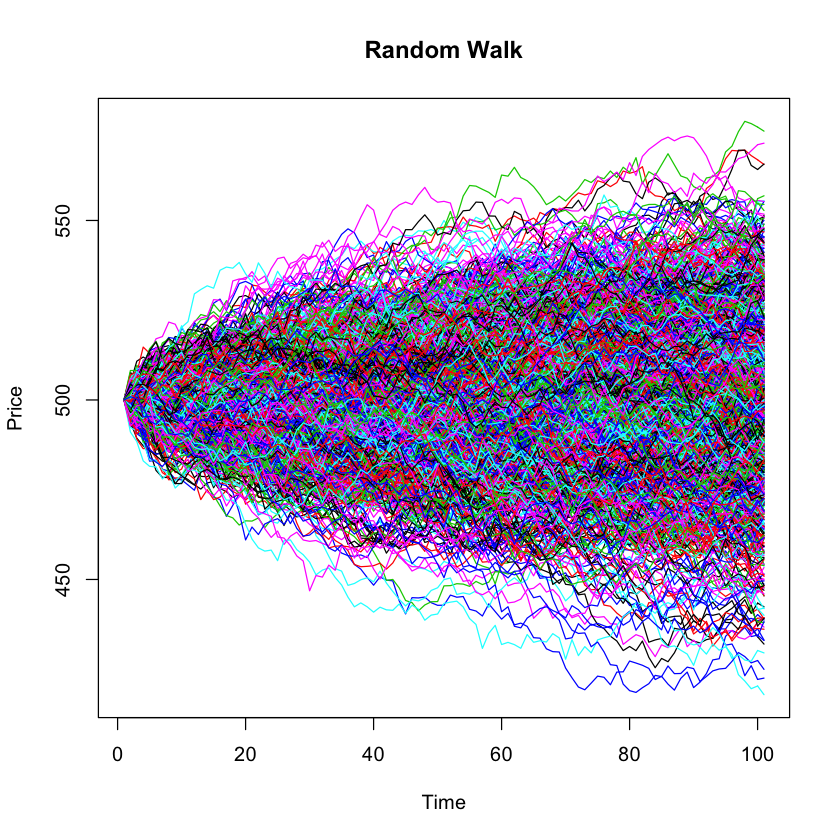

In [6]:
matplot(mtx, main = "Random Walk", xlab = "Time", ylab = "Price", type = "l", lty = 1)

We can take a sample of the simulations we created and visualize them:
![random_walk](https://www.dropbox.com/s/grup17rhlyvzovz/random_walk.gif?raw=1)

And see the distribution of prices in the last day for all simulations:

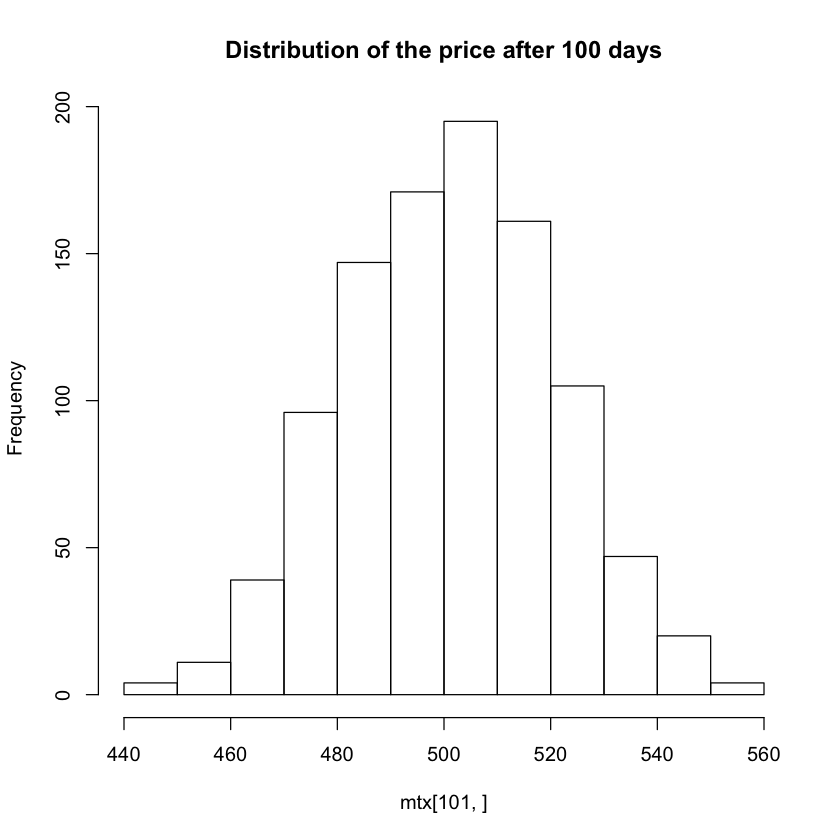

In [60]:
# We want to see the last row of mtx
hist(mtx[101,], main = "Distribution of the price after 100 days")

The price after 100 days has a wide range, but its mean is still the initial price of $500$:

In [61]:
# Average price:
mean(mtx[101,])

[1] 501.2152

This is a property of random walks since:
$$E[Y_{t}] = Y_0$$

___
<a name="3"></a>
## Visualizing and commenting on the price of a stock

As financial analysts, it is not enough to do pretty plots, simulations, and write a lot of code, we need to go beyond and try to tell a story and be able to understand and explain what has happened. In this section we will use the `PRC.RData` file we created to analyse the stock price of General Electric.

First we load the data:

In [62]:
load("PRC.RData")

And open the first rows to remember how it looks:

In [63]:
head(PRC)

date,MSFT,XOM,GE,JPM,INTC,C
1990-01-02,0.6163194,12.5000,5.562500,10.00000,1.125000,22.87621
1990-01-03,0.6197917,12.3750,5.552083,10.33333,1.093750,23.16825
1990-01-04,0.6380208,12.2500,5.520833,10.37500,1.117188,22.87621
1990-01-05,0.6223958,12.1875,5.468750,10.41667,1.109375,23.07090
1990-01-08,0.6319444,12.3750,5.500000,10.41667,1.125000,23.26559
1990-01-09,0.6302083,12.1250,5.385417,10.08333,1.156250,22.97356


Now let's extract the information for General Electrics and plot the prices. The `subset()` function keeps the output as a `data.frame`. If we wanted the output as a vector, we could use `PRC$GE`:

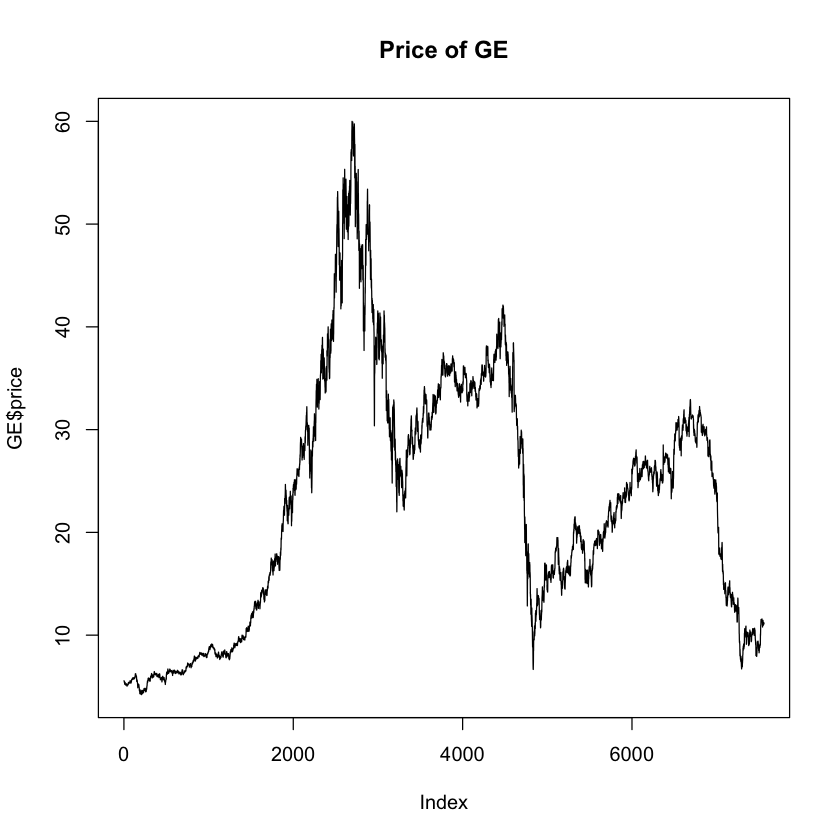

In [64]:
# Subset the PRC data frame
GE <- subset(PRC, select = "GE")

# Rename the column as price
names(GE) <- "price"

# Plot
plot(GE$price, type = "l", main = "Price of GE")

This plot is useless for analysis without including dates:

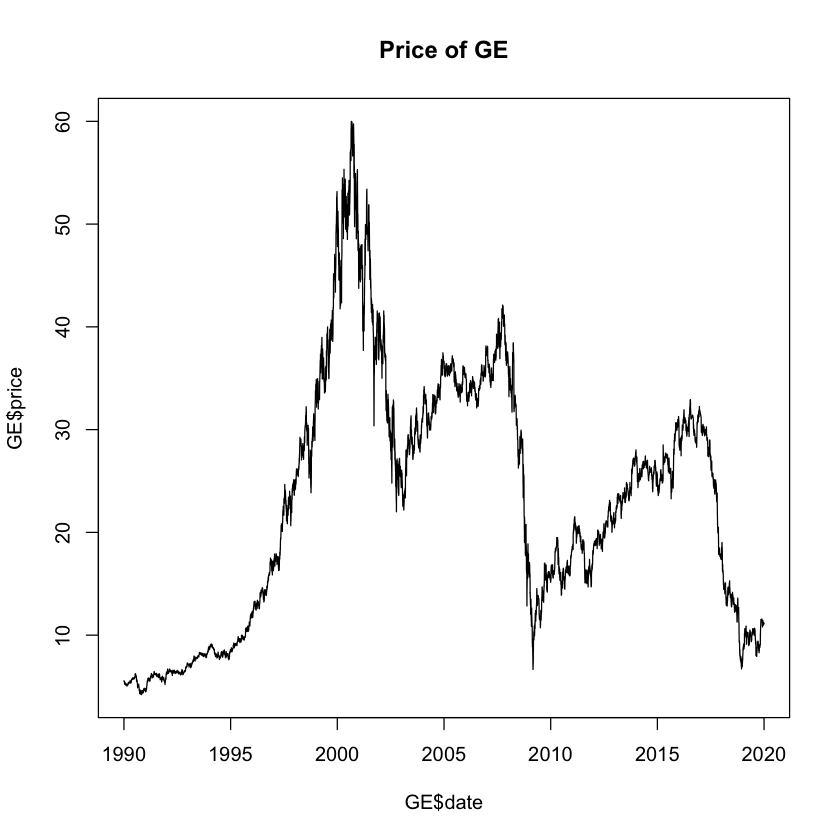

In [65]:
GE$date <- PRC$date
plot(GE$date, GE$price, type = "l", main = "Price of GE")

We see General Electric doing well in the second half of the 90s, with an exponentially increasing price that reached a peak around 2000. The effect of the financial crisis is clear with a significant drop in the price around 2008. 

First, let's find what the maximum price of GE was, and when it was reached:

In [66]:
# Finding the highest price
max(GE$price)

# We can find the date when this happened in two different but equivalent ways
# 1. Filtering the dates when the stock price was at its maximum
GE$date[GE$price == max(GE$price)] 
# 2. Find the index where the maximum value is reached, and use it as a filter
GE[which.max(GE$price),]

[1] 60

[1] "2000-08-28"

,price,date
2694,60,2000-08-28


Jack Welch, who was the CEO of GE for 20 years, retired on September 7, 2001. He was considered to be one of the most valuables CEOs of all time. Let's add a vertical line on our plot to reflect this:

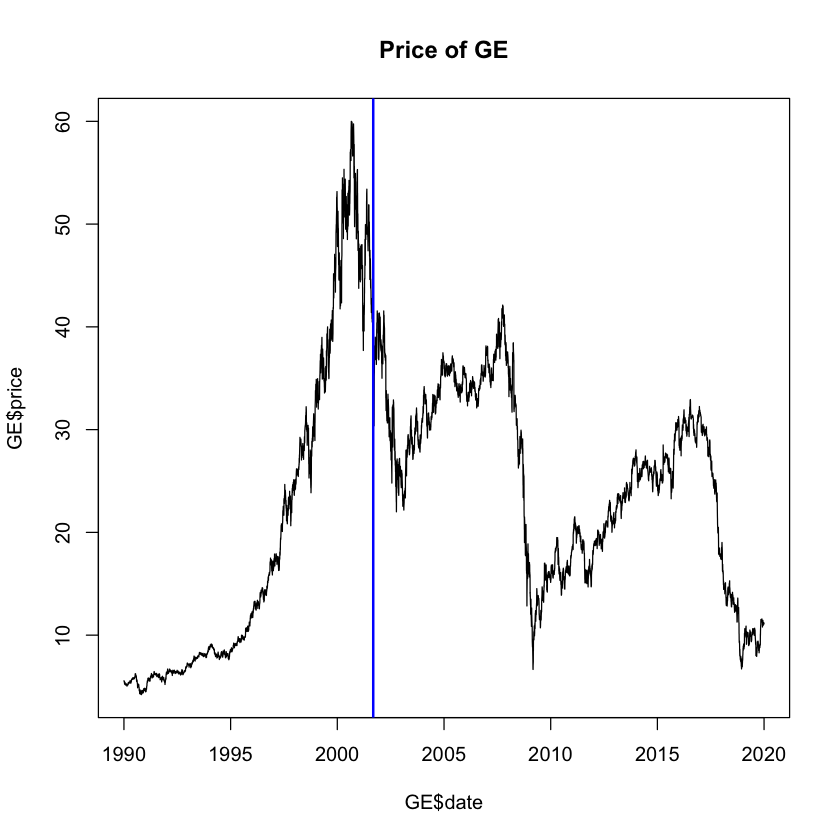

In [67]:
# First we plot the data
plot(GE$date, GE$price, type = "l", main = "Price of GE")

# We add a vertical line using abline and the function ymd to turn a number into a Date
abline(v = ymd(20010907), lwd = 2, col = "blue")

Now let's zoom into the crisis using the `xlim` option:

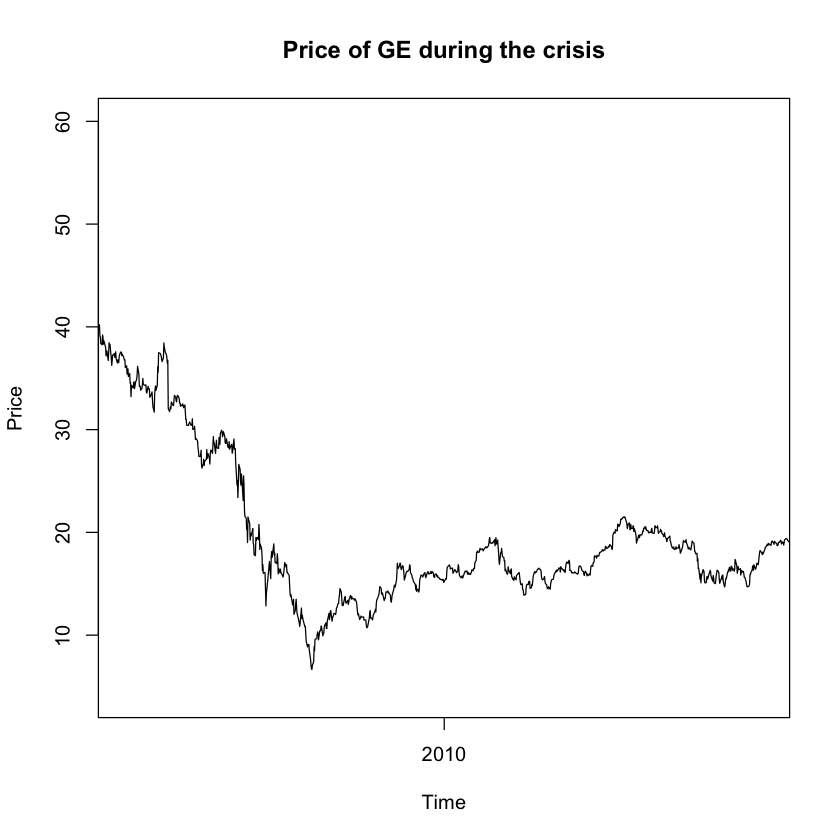

In [68]:
# First we create the limits
x_left = ymd(20080101)
x_right = ymd(20120101)

# Use xlim to incorporate them
plot(GE$date, GE$price, type = "l", main = "Price of GE during the crisis",
     xlab = "Time", ylab = "Price", xlim = c(x_left, x_right))

We now have a plot that indeed zooms into the price of GE during the crisis, which is what we wanted. However, the plot is again useless if we do not format the x-axis to see the dates:

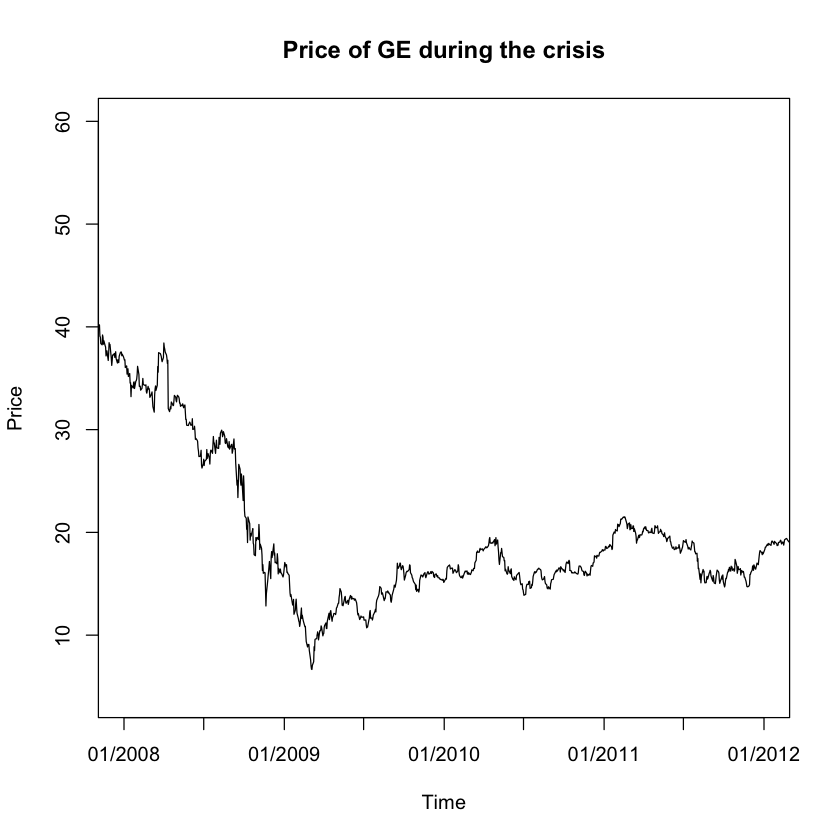

In [69]:
# Create the plot again
plot(GE$date, GE$price, type = "l", main = "Price of GE during the crisis",
     xlab = "Time", ylab = "Price", xlim = c(x_left, x_right), xaxt = "na")

# Use axis.Date to edit 
axis.Date(1, at=seq(x_left, x_right, by="6 mon"), format="%m/%Y")

It is clear that GE, as many other firms, suffered during the financial crisis. But we want to tell a story that goes beyond just presenting a plot. Every piece of financial data that we use needs to be accompanied by research. 

In the particular case of General Electric, one of the main reasons of its profitable situation until early 2008 was GE Capital, a subsidiary of the firm that focused on financial services. GE Capital almost went bust in the crisis due to its high leverage, which had a significant effect on its parent company.

To continue our analysis, we will load the `RET.RData` data frame and add a column to `GE` with the firm's returns:

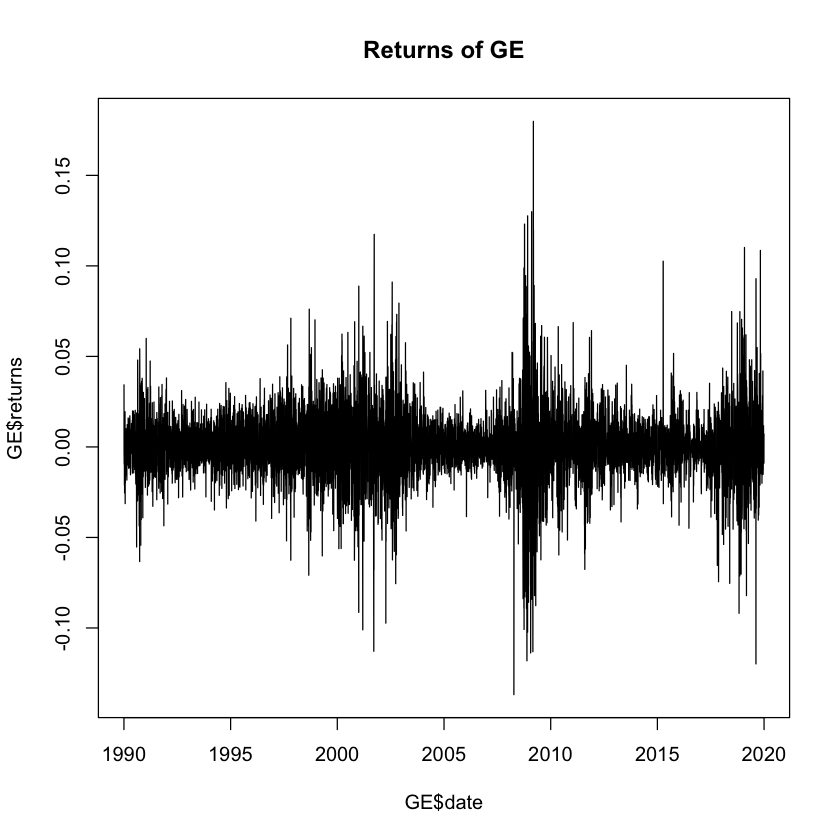

In [70]:
# Loading the data
load("Y.RData")

# Adding the returns to our GE data frame
GE$returns <- Y$GE

# Plot the returns
plot(GE$date, GE$returns, type = "l", main = "Returns of GE")

This plot shows clearly shows the _volatility clusters_ discussed in class. As we expect, there is a large volality cluster during the crisis. 

There is another more recent cluster. On October 1st, 2018, the company decided to fire its CEO unexpectedly. Let's zoom into this period to see if there was an effect:

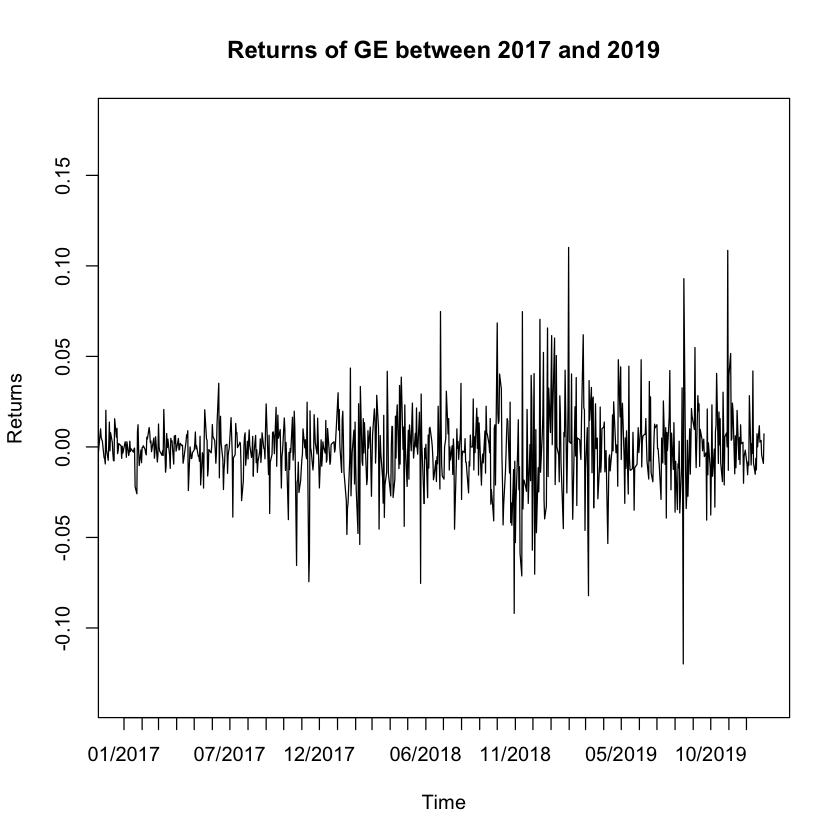

In [71]:
x_left = ymd(20170101)
x_right = ymd(20191231)

plot(GE$date, GE$returns, type = "l", main = "Returns of GE between 2017 and 2019", 
         xlab = "Time", ylab = "Returns", xlim = c(x_left, x_right), xaxt = "na")

axis.Date(1, at=seq(x_left, x_right, by="1 mon"), format="%m/%Y")

Whenever we want to talk about a stock, part of the story is external, like the economy, but another part of it is internal, like firing the CEO. It is important to always take both into account when performing an analysis.

___
<a name="4"></a>
## Graphical Analysis and Statistical Tests

### Normality of returns

Returns are not normally distributed. Financial data exhibits _fat tails_, which means that extreme values, both positive and negative, are seen more frequently than what we would expect if the data followed a normal distribution. Also, in financial data most days are uneventful, so we see a higher frequency of points around zero than in a normal distribution. 

To show this graphically, we will plot the histogram of returns for GE and overlay a normal distribution with the same mean and standard deviation:

[1] "Mean: 0"

[1] "Standard Deviation: 0.018"

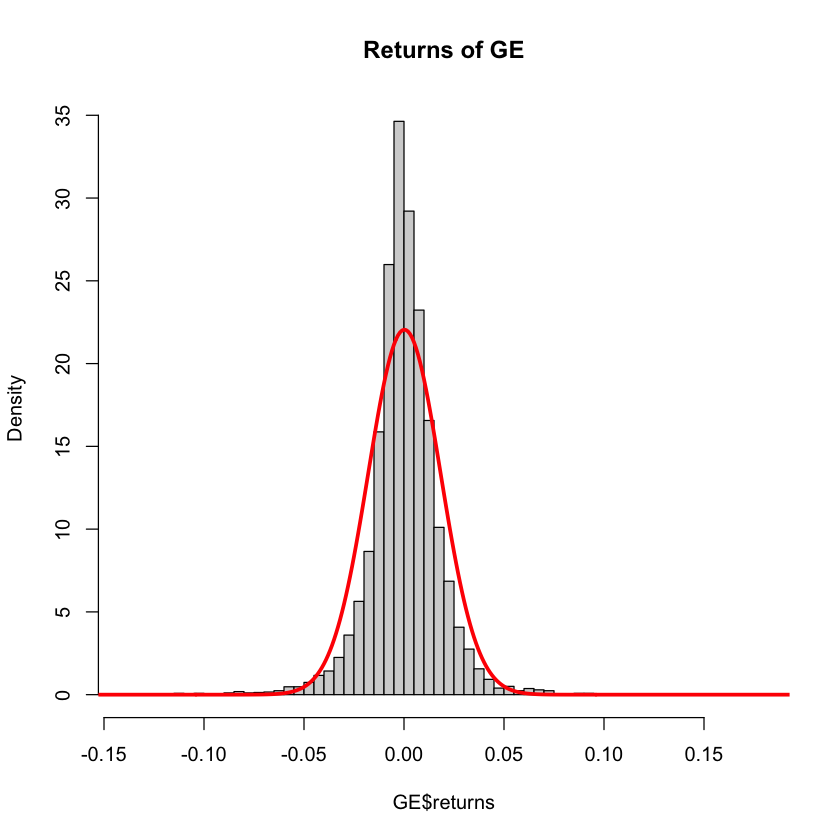

In [72]:
# Get the mean and sd of returns
ge_mean <- mean(GE$returns)
ge_sd <- sd(GE$returns)
paste0("Mean: ", round(ge_mean,3))
paste0("Standard Deviation: ", round(ge_sd,3))

# Create the histogram
hist(GE$returns, freq = FALSE, main = "Returns of GE", col = "lightgrey", breaks = 50)

# Add the normal distribution
x <- seq(-3,3,0.001)
lines(x, dnorm(x, mean = ge_mean, sd = ge_sd), lwd = 3, col = "red")

It is visually obvious that the returns do not follow a normal distribution with matched moments. However, _visually obvious_ is not a rigurous statement, so we should perform a statistical test to prove this.

To see if a vector of numbers follows could have been drawn from a normal distribution, we will use the Jarque-Bera test, which uses skewness and kurtosis. The test statistic of the Jarque-Bera test asymptotically follows a chi-square distribution with two degrees of freedom. The null hypothesis, $H_0$, of the test is that the skewness and excess kurtosis of a distribution are jointly zero, which is the equivalent of a Normal Distribution.  This test can be directly implemented with the `jarque.bera.test()` function from the `tseries` package:

In [73]:
jarque.bera.test(GE$returns)


	Jarque Bera Test

data:  GE$returns
X-squared = 19462, df = 2, p-value < 2.2e-16


To understand the output of a test, we can look at the p-value. A p-value below 0.05 tells us that we have enough evidence to reject the null hypothesis $H_0$ with a confidence level of 95%. Statistically, the p-value is the inverse of the test-statistic under the CDF of the asymptotic distribution.

The p-value of this test is basically zero, which means that we have enough evidence to reject the null hypothesis that our data has been drawn from a Normal distribution.

### Fat tails and QQ-Plots

Other distributions that exhibit _fat tails_ might be more suitable to work with. A common choice is the Student-t distribution. A graphical way to see how our data fits different distributions is by using a Quantile-Quantile Plot. This method plots the quantiles of our data against the quantiles of a specified distribution. If the distribution is a good fit for our data, we will see the data points aligning with the diagonal line.

To build QQ plots, we will use the `qqPlot` function from the `car` package:

[1] 4837 4608

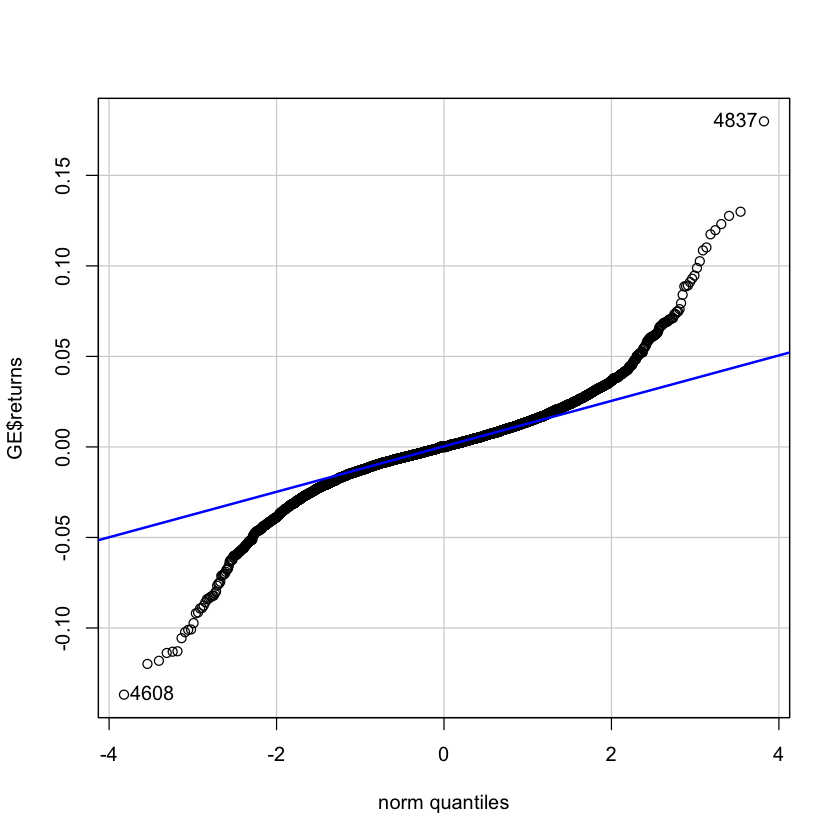

In [74]:
# qqPlot of the normal distribution
qqPlot(GE$returns, distribution = "norm", envelope = FALSE)

We expect our data to have a better fit with a Student-t. To find out the degrees of freedom to use, we will do different qqPlots:

[1] 4837 4608

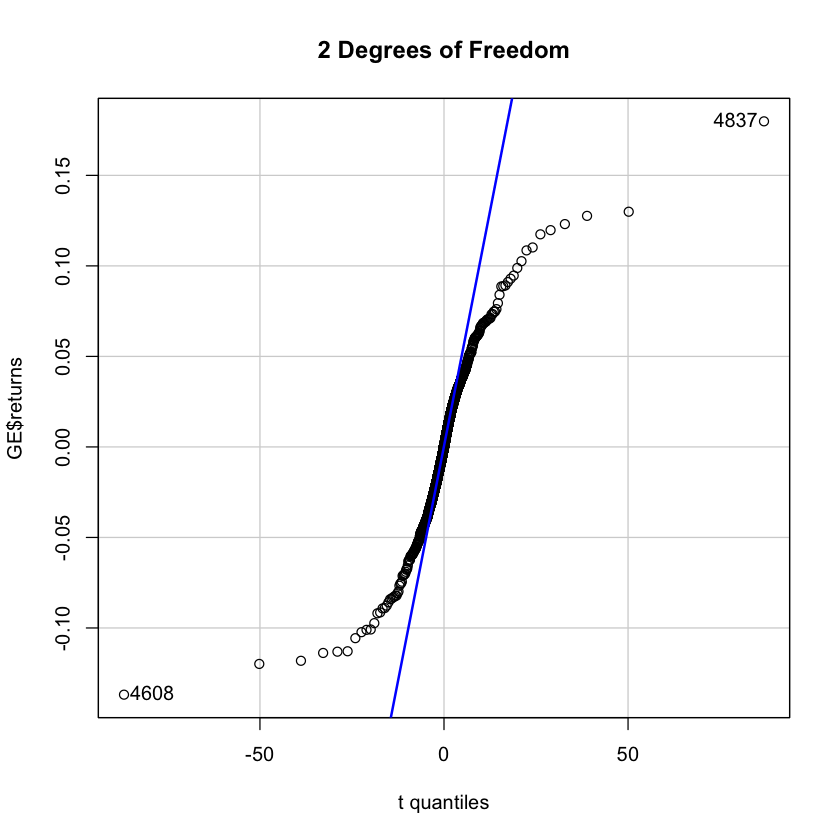

[1] 4837 4608

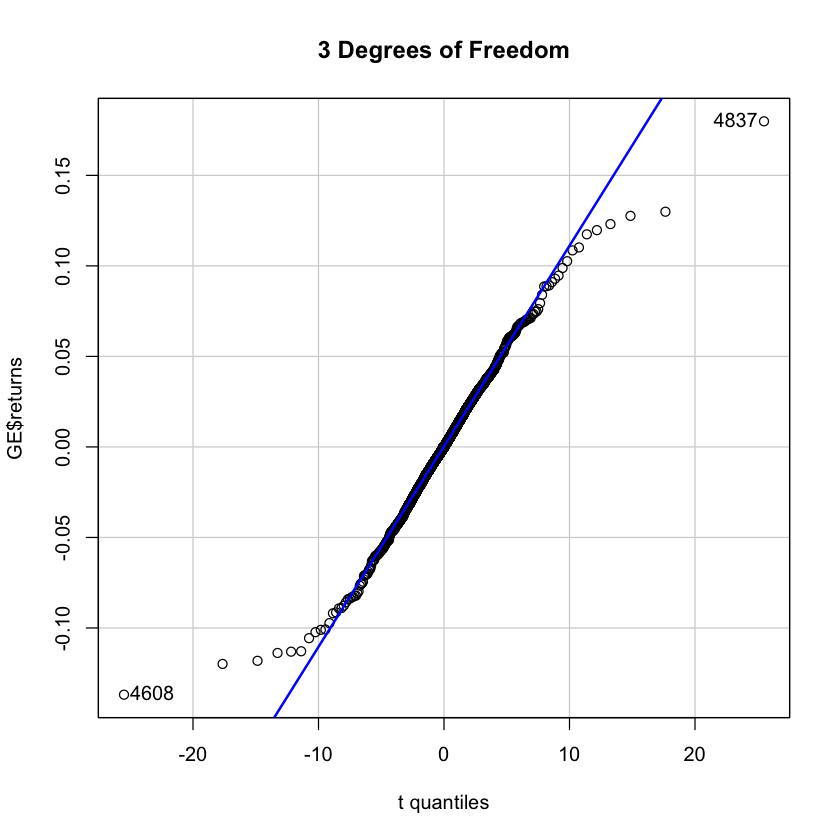

[1] 4837 4608

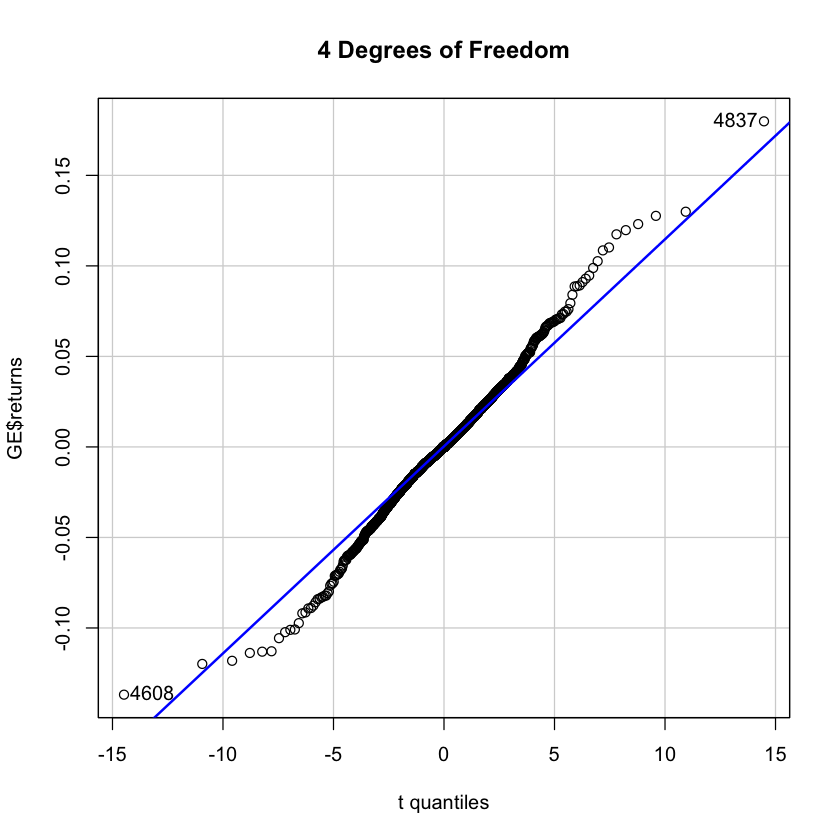

In [75]:
# 2 degrees of freedom
qqPlot(GE$returns, distribution = "t", df = 2, envelope = FALSE,
      main = "2 Degrees of Freedom")

# 3 degrees of freedom
qqPlot(GE$returns, distribution = "t", df = 3, envelope = FALSE,
      main = "3 Degrees of Freedom")

# 4 degrees of freedom
qqPlot(GE$returns, distribution = "t", df = 4, envelope = FALSE,
      main = "4 Degrees of Freedom")

The best fit seems to be a Student-t with 3 degrees of freedom.

### Autocorrelation

The autocorrelation function shows us the linear correlation between a value in our time series with its different lags. For example, if tomorrow's return can be determined with today's value, we would expect to have a significant autocorrelation of lag one.

The `acf` function plots the autocorrelation of an ordered vector. The horizontal lines are confidence intervals, meaning that if a value if outside of the interval, it is considered significantly different from zero. 

Let's first take a look at the `acf` of returns:

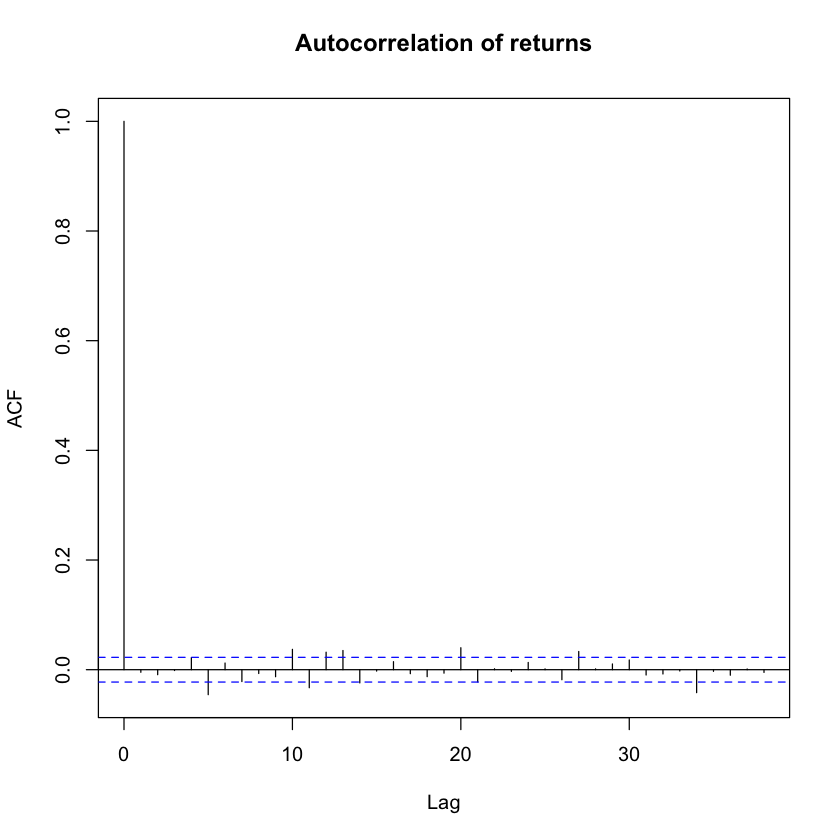

In [76]:
# Autocorrelation of returns
acf(GE$returns, main = "Autocorrelation of returns")

The autocorrelation of lag 0 is always 1 (every value is perfectly correlated with itself), but apart from that, we see no significant values. Remember than with a 95% confidence interval, we would expect to see 1 out of every 20 values to show significance out of pure chance.

This shows us good evidence that you cannot easily forecast stock prices. If there was a clear autocorrelation, you could build trading strategies to create profit, but the market makes sure this is not the case.

Even if returns show no autocorrelation, let's see what happens with returns squared, which are our estimate for volatility:

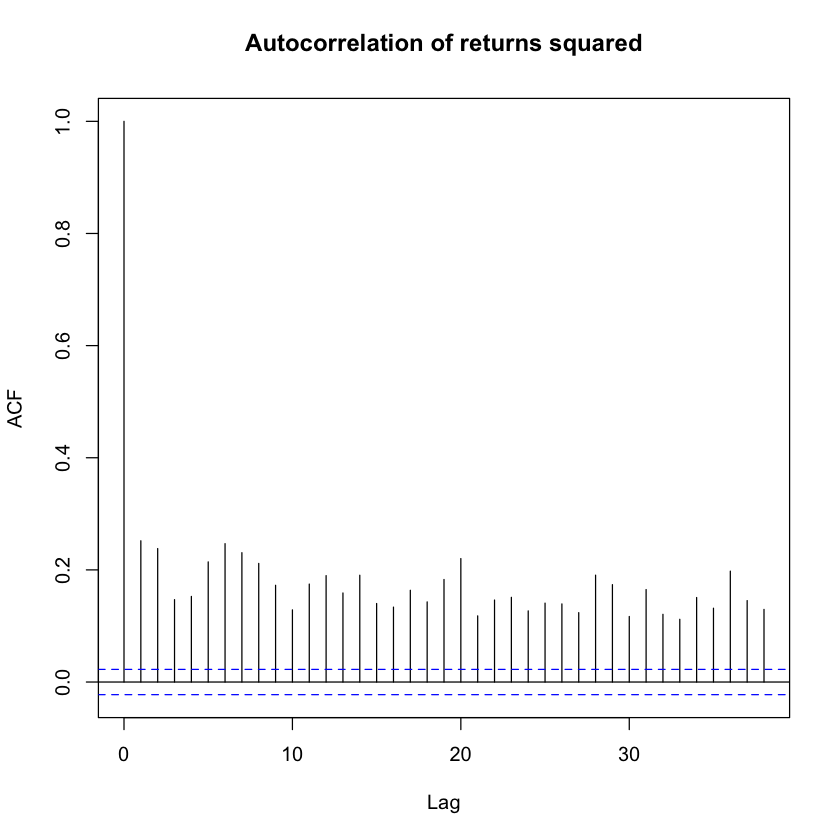

In [77]:
# Autocorrelation of returns squared
acf(GE$returns^2, main = "Autocorrelation of returns squared")

We clearly see there is a strong positive autocorrelation for all shown lags. This pattern is normally seen in _long memory time series_. Recall that in a GARCH model, the size of $\alpha + \beta$ determines the memory of the time series. We will discuss more of the GARCH properties in lecture. We can extend the lags up to 100:

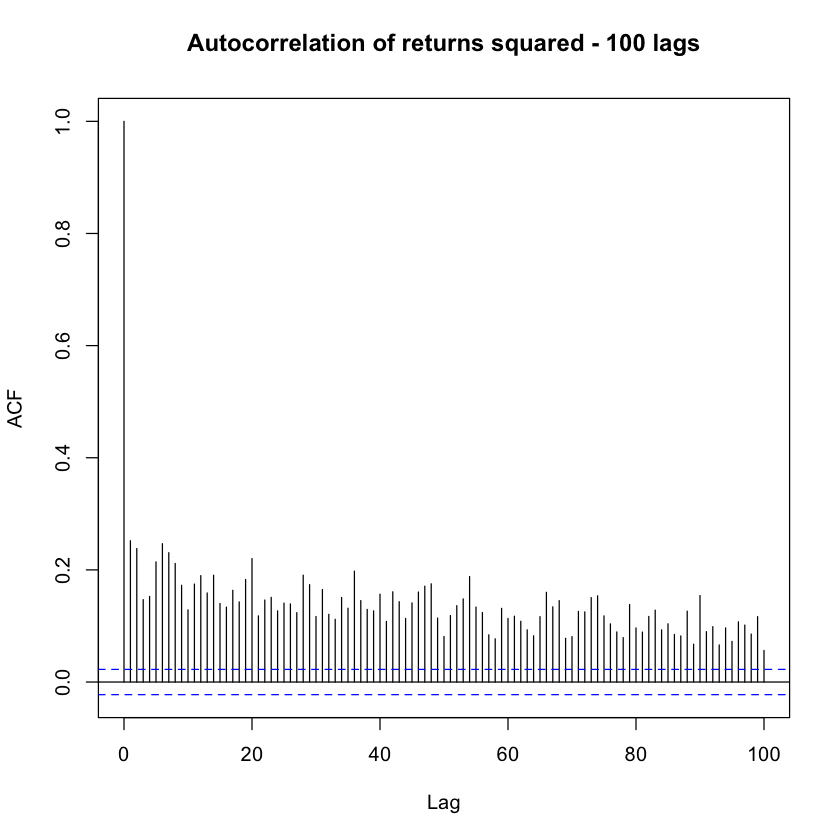

In [78]:
# Autocorrelation of returns squared, 100 lags
acf(GE$returns^2, main = "Autocorrelation of returns squared - 100 lags", lag.max = 100)

#### Using a custom ACF plot

The plots for the Autocorrelation Function `acf()` are not visually helpful. The lines are thin and the fact that the autocorrelation of lag 0 is always equal to 1 distorts the scale of the plot. Instead of using the `acf()` function, we will import a function called `acf_fm442()` that produces a better looking ACF plot. The code that creates this plot is in the file `acf_fm442.R`, along with the documentation on how to use the function. If we put the file in our working directory and use the function `source()`, we can import the function into our environment:

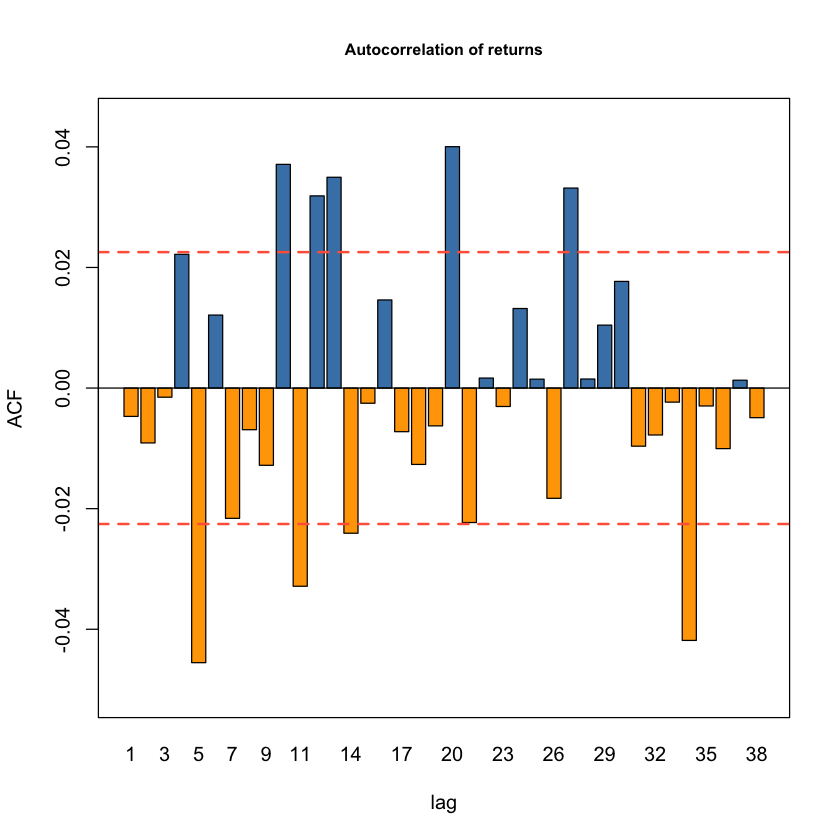

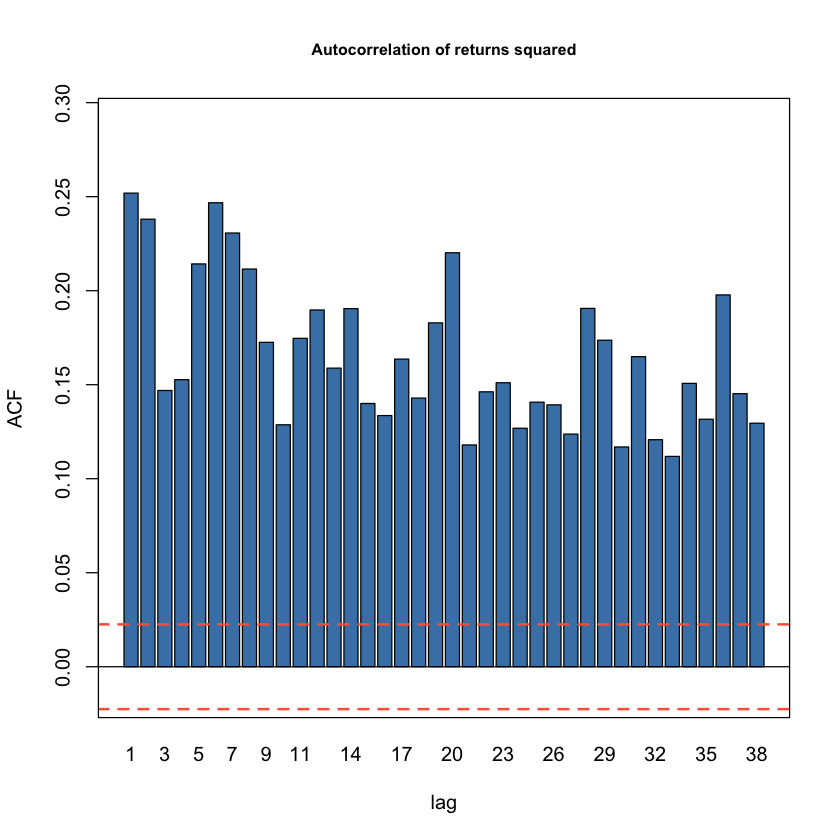

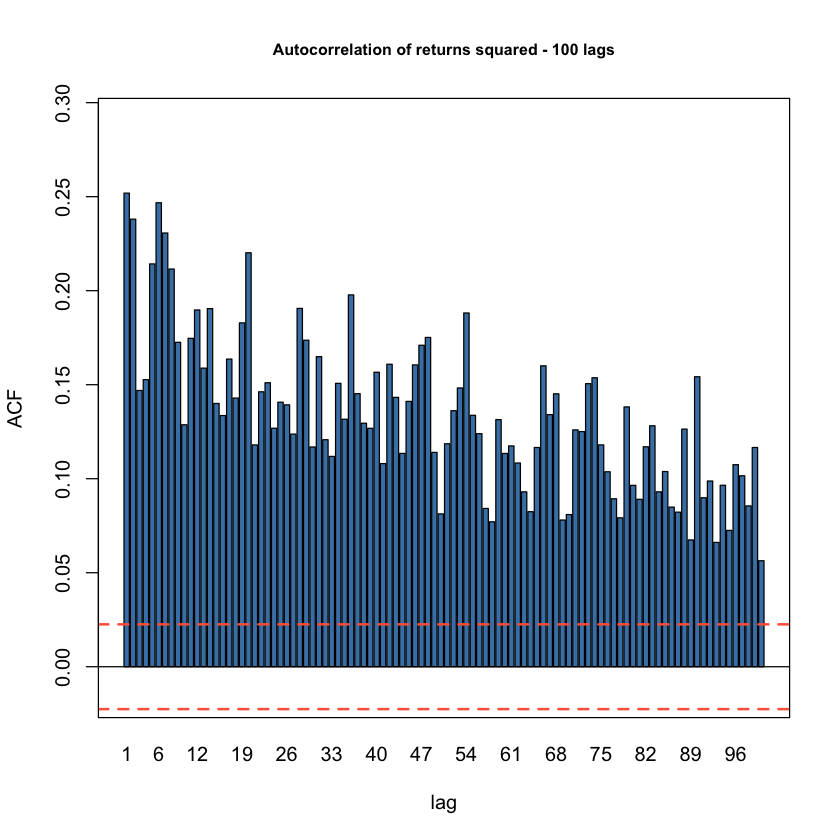

In [79]:
# Importing the acf_fm442 function
source("acf_fm442.R")

# Now we can plot again the objects using acf_fm442:
acf_fm442(GE$returns, main = "Autocorrelation of returns")
acf_fm442(GE$returns^2, main = "Autocorrelation of returns squared")
acf_fm442(GE$returns^2, main = "Autocorrelation of returns squared - 100 lags", lag.max = 100)

We can use the _Ljung-Box_ test to test for serial correlation. This is a statistical tesf of whether any autocorrelations of a time series are different from zero. The null hypothesis $H_0$ is that the data are independently distributed, while $H_1$ is that the data exhibit serial correlation. The test statistic is distributed as a chi-square. 
The function `Box.test` can perform this test:

In [80]:
Box.test(GE$returns, type = "Ljung-Box")
Box.test(GE$returns^2, type = "Ljung-Box")


	Box-Ljung test

data:  GE$returns
X-squared = 0.1672, df = 1, p-value = 0.6826



	Box-Ljung test

data:  GE$returns^2
X-squared = 479.8, df = 1, p-value < 2.2e-16


## Recap

In this seminar we have covered:

* Using R to work with CDF, inverse CDF, and PDF of various statistical distributions
* Drawing random numbers from specified distributions
* Using seeds for replicability
* Small and large sample properties of random numbers drawn from a distribution 
* Using Monte Carlo
* Visualizing a Random Walk
* Analyzing and commenting on the price of a stock
* Telling a financial story using data as support
* Testing for normality
* Creating QQ-plots
* Autocorrelation function`
* Importing a function

Some new functions used:

* `pnorm()`
* `dnorm()`
* `qnorm()`
* `rnorm()`
* `set.seed()`
* `quantile()`
* `abline()`
* `axis.Date()`
* `jarque.bera.test()`
* `qqPlot()`
* `acf()`
* `source()`

For more discussion on the material covered in this seminar, refer to _Chapter 1: Financial markets, prices and risk_ on _Financial Risk Forecasting_ by Jon Danielsson.

<small> Acknowledgements: Thanks to Alvaro Aguirre for creating these notebooks</small>  
<small> © Jon Danielsson, 2020 </small>